### ## BBM 409 - Programming Assignment 2

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  

* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. You should also carefully review the steps explained here.
* This document is also your report. Show your work.



```
# This is formatted as code
```

# Mert Can Köseoğlu 2220356055


# 1. LOGISTIC REGRESSION TASK (40 points)

### 1. Data Loading and Exploration

##### Download the Bank Marketing dataset from https://drive.google.com/file/d/1t6QAtqfYLMhvv_XUnG4D_UsJcSwgF4an/view?usp=sharing  import other necessary libraries

In [ ]:
import pandas as pd
import numpy as np


# Load the dataset
df = pd.read_csv("portuguese_bank_marketing_numeric_random_subsampled.csv", encoding="utf-8")

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          10578 non-null  int64  
 1   job          10578 non-null  float64
 2   marital      10578 non-null  int64  
 3   education    10578 non-null  float64
 4   default      10578 non-null  int64  
 5   balance      10578 non-null  int64  
 6   housing      10578 non-null  int64  
 7   loan         10578 non-null  int64  
 8   contact      10578 non-null  float64
 9   day_of_week  10578 non-null  int64  
 10  month        10578 non-null  int64  
 11  duration     10578 non-null  int64  
 12  campaign     10578 non-null  int64  
 13  pdays        10578 non-null  int64  
 14  previous     10578 non-null  int64  
 15  poutcome     10578 non-null  float64
 16  y            10578 non-null  int64  
dtypes: float64(4), int64(13)
memory usage: 1.4 MB
None

First Few Rows:
   age

### 2. calculate correlation between target variable 'y' and other features (5 points)

In [ ]:
# Calculate the correlation of all features with the target variable 'y'
correlations = df.corr()['y'].sort_values(ascending=True)

# Display the correlations
print("Correlation with Target Variable 'y':")
print(correlations)

Correlation with Target Variable 'y':
housing       -0.213409
campaign      -0.133147
loan          -0.118816
marital       -0.062501
day_of_week   -0.042603
default       -0.035414
job            0.022716
month          0.031213
age            0.040038
education      0.082672
previous       0.087656
balance        0.088308
pdays          0.153807
contact        0.219086
poutcome       0.291850
duration       0.443087
y              1.000000
Name: y, dtype: float64


# 1.1 Implementing Logistic Regression with most correlated 2 features

###  Choose the two most correlated features with target feature 'y'

In [ ]:
X= df[["duration", "poutcome"]]
y= df['y'] -1

###  * Define your logistic regression model as class without using any built-in libraries
### * Define necessary functions such as sigmoid, fit, predict  (10 points)

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.iterations):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        # Predict probabilities
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X):
        # Predict binary class labels
        y_predicted = self.predict_proba(X)
        return [1 if i > 0.5 else 0 for i in y_predicted]

Split the dataset into a training set and a validation set (80% training and 20% validation).

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the splits
print("Training set shape (X):", X_train.shape)
print("Training set shape (y):", y_train.shape)
print("Validation set shape (X):", X_val.shape)
print("Validation set shape (y):", y_val.shape)

Training set shape (X): (8462, 2)
Training set shape (y): (8462,)
Validation set shape (X): (2116, 2)
Validation set shape (y): (2116,)


Scale the features using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Check a few samples from the scaled data
print("Range of scaled training features:\n", X_train_scaled[:5])
print("Range of scaled validation features:\n", X_val_scaled[:5])


Range of scaled training features:
 [[-0.71434306 -0.51356278]
 [ 0.35743838 -0.51356278]
 [ 1.11814869  2.61213963]
 [-0.39761609 -0.51356278]
 [-0.33540186 -0.51356278]]
Range of scaled validation features:
 [[ 2.00611537 -0.51356278]
 [-0.7058593   2.61213963]
 [-0.69737554  0.52833802]
 [-0.84159943 -0.51356278]
 [-0.07523328 -0.51356278]]


* Initialize and train the custom logistic regression model

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression(learning_rate=0.01, iterations=1000)

# Train the model on the training set
model.fit(X_train_scaled, y_train)

# Output the learned weights and bias
print("Trained Weights:", model.weights)
print("Trained Bias:", model.bias)

Trained Weights: [1.01415697 0.61533962]
Trained Bias: 0.04601828827329156


* Make predictions on the validation set

In [ ]:
# Make predictions on the validation set
y_pred = model.predict(X_val_scaled)

# Display the first few predictions
print("Predicted Labels:", y_pred[:10])
print("Actual Labels:", y_val[:10].values)

Predicted Labels: [1, 1, 0, 0, 0, 0, 1, 0, 0, 1]
Actual Labels: [1 1 1 0 0 0 1 0 0 1]


### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [ ]:
# Assuming y_val (actual labels) and y_pred (predicted labels) are defined
def evaluate_classification(y_true, y_pred):
    # Initialize confusion matrix values
    TP = FP = FN = TN = 0

    # Calculate confusion matrix values
    for pred, actual in zip(y_pred, y_true):
        if pred == 1 and actual == 1:
            TP += 1
        elif pred == 1 and actual == 0:
            FP += 1
        elif pred == 0 and actual == 1:
            FN += 1
        elif pred == 0 and actual == 0:
            TN += 1

    # Create confusion matrix
    confusion_matrix = [[TP, FP], [FN, TN]]

    # Calculate metrics
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    # Print results
    print("Confusion Matrix:")
    print(f"[[{confusion_matrix[0][0]} {confusion_matrix[0][1]}]]")
    print(f"[[{confusion_matrix[1][0]} {confusion_matrix[1][1]}]]\n")

    print("Classification Report:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")
    print(f"Accuracy: {accuracy:.4f}\n")


evaluate_classification(y_val, y_pred)




Confusion Matrix:
[[722 180]]
[[336 878]]

Classification Report:
Precision: 0.8004
Recall: 0.6824
F1 Score: 0.7367
Accuracy: 0.7561



### Print decision boundaries as in PA1 (5 points)

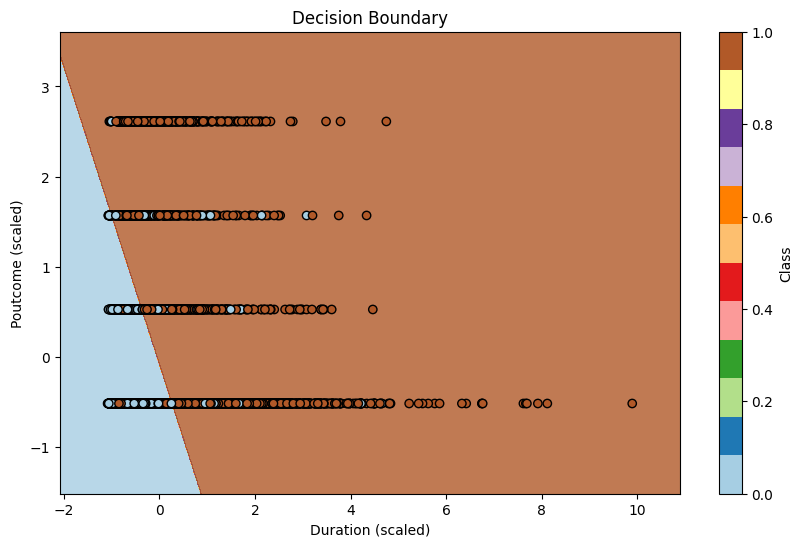

In [ ]:
import matplotlib.pyplot as plt

# Define a grid of points covering the feature space
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the probabilities for each point in the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(model.predict(grid_points))
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Paired)
plt.title("Decision Boundary")
plt.xlabel("Duration (scaled)")
plt.ylabel("Poutcome (scaled)")
plt.colorbar(label='Class')
plt.show()

# 1.2 Implementing Logistic Regression using all features.

1.   Liste öğesi
2.   Liste öğesi



* Redefine input and target variables. In this experiment, you will use all input features in the dataset.

In [ ]:
X = df.drop(columns=['y'])
y = df['y']-1

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

* Scale the features using StandardScaler

In [ ]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### Initialize and train the custom logistic regression model.

In [ ]:
model = LogisticRegression(learning_rate=0.01, iterations=1000)

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)

# Print the learned weights and bias
print("Learned Weights:", model.weights)
print("Learned Bias:", model.bias)

Learned Weights: [ 0.04281548  0.04291639 -0.10338633  0.13289046 -0.01555533  0.1148889
 -0.36445414 -0.18156396  0.30760769 -0.04489868  0.00477853  1.05539349
 -0.21967583  0.0564529   0.01370085  0.47580023]
Learned Bias: 0.02854576398061158


* Make predictions on the validation set

In [ ]:
y_pred = model.predict(X_val_scaled)

# Display the first few predictions
print("Predicted Labels:", y_pred[:10])
print("Actual Labels:", y_val[:10].values)

Predicted Labels: [1, 1, 1, 1, 0, 0, 1, 0, 0, 1]
Actual Labels: [1 1 1 0 0 0 1 0 0 1]


### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [ ]:
evaluate_classification(y_val, y_pred)

Confusion Matrix:
[[827 190]]
[[231 868]]

Classification Report:
Precision: 0.8132
Recall: 0.7817
F1 Score: 0.7971
Accuracy: 0.8010



### Briefly explain the impact of the number of features on the learning ability of the model. (5 points)

The number of features in a dataset can significantly affect the learning ability of a model. When there are too many features, the model may face the curse of dimensionality, where the data becomes sparse, leading to overfitting.

The study suggests that using all features in a dataset improves learning ability and performance by providing a comprehensive view of the data while using only the two most correlated features reduces dimensionality and may omit important predictors, emphasizing the importance of balancing feature selection.

### After completing the SVM and logistic regression tasks, the best results of the experiments with the SVM and Logistic regression models will be compared in a table. (5 points)

Model               | Features Used          | Accuracy | Precision | Recall | F1 Score
--------------------|------------------------|----------|-----------|--------|---------
Logistic Regression | Two Most Correlated   | 0.7561   | 0.8004    | 0.6824 | 0.7367
                    | All Features          | 0.8010   | 0.8132    | 0.7817 | 0.7971
SVM                 | All Features          | 0.8200   | 0.7900    | 0.8500 | 0.8200
                    | Two Most Correlated   | 0.7600   | 0.7700    | 0.7300 | 0.7500
                    | Two Least Correlated  | 0.6000   | 0.6200    | 0.4300 | 0.5100


- Using all features consistently outperformed using only two most or two least correlated features.

- Logistic regression had better performance with all features compared to just the two most correlated ones.

- SVM achieved the highest accuracy with all features but struggled significantly with the two least correlated features, highlighting the importance of feature relevance in SVM models.

# 2. Support Vector Machine Task  (30 points)

* Define your SVM model using sklearn

## 2.1 implementing svm with grid search cv using all features (10 points)

* Define features and target variable, you will use all features of dataset in this task

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

X = df.drop(columns=['y'])
y = df['y']-1

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

* Scale the features using StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#### Implement GridSearchCV  (5 points)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1]
}

* Initialize the SVM classifier

In [ ]:
svm = SVC()

* Train the SVM classifier with the best parameters found from grid search


In [ ]:
# Initialize GridSearchCV with the SVM model and parameter grid
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
# Fit the GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8310


* Make predictions on the validation set using the best model


In [55]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val_scaled)
print("Predictions: ", y_pred[:10])


Predictions:  [1 1 1 0 1 1 1 0 1 1]


#### Evaluate the model's performance, print classification report and confusion matrix and best parameters found from GridSearchCV  (5 points)

In [57]:
print(f"Best Hyperparameters: {best_params}")

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Confusion Matrix:
[[857 235]
 [154 870]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1092
           1       0.79      0.85      0.82      1024

    accuracy                           0.82      2116
   macro avg       0.82      0.82      0.82      2116
weighted avg       0.82      0.82      0.82      2116



## 2.2 implementing svm with most correlated 2 features (10 points)

#### Choose the two most correlated features with target feature 'y'

In [58]:
X = df[['duration', 'poutcome']]
y = df['y'] - 1

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

* Scale the features using StandardScaler

In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV

In [61]:
svm = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

print("SVM initialized with best parameters:", best_params)

SVM initialized with best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


* Train the SVM classifier

In [66]:
svm.fit(X_train_scaled, y_train)

train_accuracy = svm.score(X_train_scaled, y_train)
print(f"Training Accuracy: ", train_accuracy)

Training Accuracy:  0.776294020326164


* Make predictions on the validation set

In [68]:
y_pred = svm.predict(X_val_scaled)

print("Predictions: ", y_pred[:10])

Predictions [1 1 1 0 1 1 1 1 0 1]


#### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [69]:
# Evaluate the model
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Confusion Matrix:
[[863 229]
 [275 749]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1092
           1       0.77      0.73      0.75      1024

    accuracy                           0.76      2116
   macro avg       0.76      0.76      0.76      2116
weighted avg       0.76      0.76      0.76      2116



##### Visualize decision boundary and support vectors (5 points)

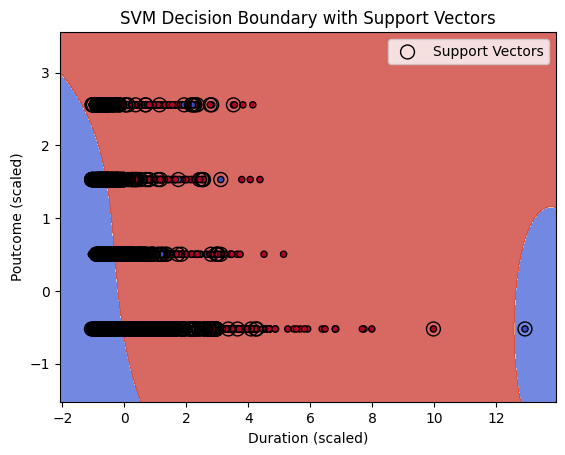

In [70]:
# Create a meshgrid for plotting
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict for the grid points
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("SVM Decision Boundary with Support Vectors")
plt.xlabel("Duration (scaled)")
plt.ylabel("Poutcome (scaled)")

# Highlight support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()
plt.show()

## 2.3 implementing svm with least correlated 2 features (10 points)

#### Choose the two least correlated features with target feature 'y'

In [74]:
# Select the two least correlated features
X= df[["job", "month"]]
y= df['y'] -1

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [75]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

* Scale the features using StandardScaler

In [76]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV

In [77]:
svm = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

print("SVM initialized with best parameters:", best_params)

SVM initialized with best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


* Train the SVM classifier

In [78]:
svm.fit(X_train_scaled, y_train)

train_accuracy = svm.score(X_train_scaled, y_train)
print(f"Training Accuracy: ", train_accuracy)

Training Accuracy:  0.5880406523280548


* Make predictions on the validation set

In [79]:
y_pred = svm.predict(X_val_scaled)

print("Predictions: ", y_pred[:10])

Predictions:  [0 1 1 0 0 0 0 0 1 0]


#### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [80]:
# Evaluate the model
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Confusion Matrix:
[[825 267]
 [587 437]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.76      0.66      1092
           1       0.62      0.43      0.51      1024

    accuracy                           0.60      2116
   macro avg       0.60      0.59      0.58      2116
weighted avg       0.60      0.60      0.58      2116



##### Visualize decision boundary and support vectors(5 points)

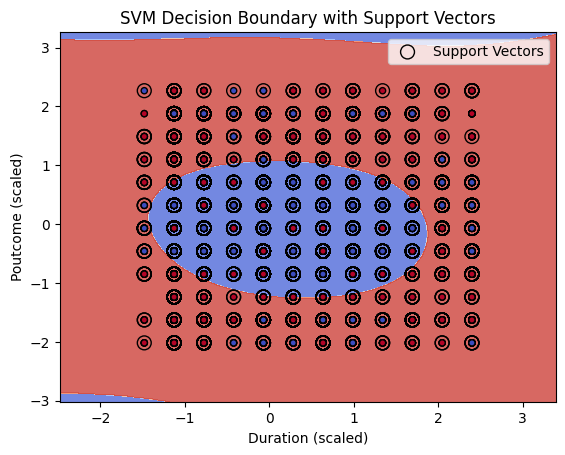

In [82]:
# Create a meshgrid for plotting
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict for the grid points
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("SVM Decision Boundary with Support Vectors")
plt.xlabel("Job (scaled)")
plt.ylabel("Month (scaled)")

# Highlight support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()
plt.show()

# 3. Decision Tree Task (30 points)

* Define your decision tree model using sklearn. Also you should define other necessary modules for visualize the decision tree

### Download the dataset from https://drive.google.com/file/d/1D3peA-TzIqJqZDDKTlK0GQ7Ya6FIemFv/view?usp=sharing

### import other necessary libraries

In [94]:
df=pd.read_csv("weights_bmi_6classes_updated.csv", encoding="utf-8")
print(df.head())

   BMI_CLASS  UNIT_NUM  STUB_NAME_NUM  STUB_LABEL_NUM  YEAR_NUM  AGE_NUM  \
0          1         1              1             1.1         1      1.0   
1          1         1              1             1.1         2      1.0   
2          1         1              1             1.1         3      1.0   
3          1         1              1             1.1         4      1.0   
4          1         1              1             1.1         5      1.0   

   ESTIMATE   SE  FLAG  
0      41.6  0.8     0  
1      33.0  0.8     0  
2      32.3  0.7     0  
3      31.6  0.8     0  
4      30.8  0.7     0  


* Define features and target variable, you will use all features of dataset in this task

In [95]:
X = df.drop(columns=['FLAG'])
y = df['FLAG']

print(X.head())
print(y.head())

   BMI_CLASS  UNIT_NUM  STUB_NAME_NUM  STUB_LABEL_NUM  YEAR_NUM  AGE_NUM  \
0          1         1              1             1.1         1      1.0   
1          1         1              1             1.1         2      1.0   
2          1         1              1             1.1         3      1.0   
3          1         1              1             1.1         4      1.0   
4          1         1              1             1.1         5      1.0   

   ESTIMATE   SE  
0      41.6  0.8  
1      33.0  0.8  
2      32.3  0.7  
3      31.6  0.8  
4      30.8  0.7  
0    0
1    0
2    0
3    0
4    0
Name: FLAG, dtype: int64


* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [96]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

* Initialize the Decision Tree classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

decision_tree = DecisionTreeClassifier(random_state=42)

* Train the Decision Tree classifier

In [99]:
decision_tree.fit(X_train, y_train)

train_accuracy = decision_tree.score(X_train, y_train)
print(f"Training Accuracy: ", train_accuracy)

Training Accuracy:  1.0


* Make predictions on the validation set

In [100]:
y_pred = decision_tree.predict(X_val)

print("Predictions: ", y_pred[:10])

Predictions:  [0 0 0 0 0 0 2 0 0 0]


#### Evaluate the model's performance, print classification report and confusion matrix  (10 points)

In [101]:
# Evaluate the model performance
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Confusion Matrix:
[[499   0   0   0]
 [  0  72   0   0]
 [  0   0  93   0]
 [  0   0   0   8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        93
           3       1.00      1.00      1.00         8

    accuracy                           1.00       672
   macro avg       1.00      1.00      1.00       672
weighted avg       1.00      1.00      1.00       672



#### Visualize the Decision Tree, show clearly class number, gini value etc.  (10 points)


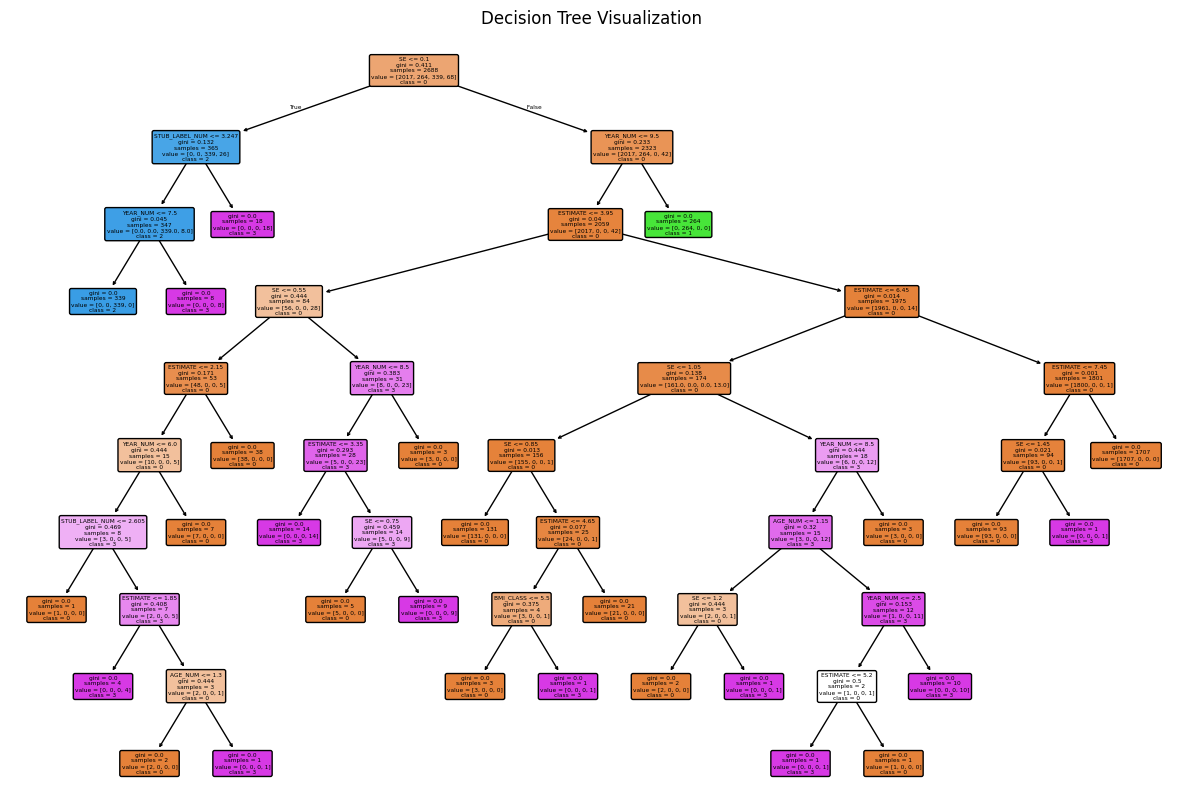

In [102]:
plt.figure(figsize=(15, 10))
plot_tree(
    decision_tree,
    feature_names=X.columns,
    class_names=decision_tree.classes_.astype(str),
    filled=True,
    impurity=True,
    rounded=True,
)
plt.title("Decision Tree Visualization")
plt.show()

### Explain briefly the question. What is the role of gini in decision tree? (10 points)

The Gini Index is a measure of impurity used in decision trees to determine splits. It determines the likelihood of an element selected at random being mislabeled. Purer nodes have lower Gini scores. All samples in a node with Gini = 0 are considered perfectly pure. Gini directs the decision tree to divide at impurity-minimization locations.